# Python for Finance Tutorial For Beginners

*This notebook was made in preparation for the DataCamp tutorial "Python for Finance Tutorial for Beginners"; If you want more explanations on the code or on using Python for Finance, go to the full tutorial [here](https://www.datacamp.com/community/tutorials/finance-python-trading).*

The full tutorial covers the following topics:

* Getting Started With Python For Finance
    - Stocks & Trading
    - Time Series Data
    - Setting Up The Workspace
    - [Python Basics For Finance: Pandas](#basics)
        - Importing Financial Data Into Python
        - Working With Time Series Data 
        - Visualizing Time Series Data
* [Common Financial Analyses](#commonanalyses)
    - Returns
    - Moving Windows
    - Volatility Calculation
    - Ordinary Least-Squares Regression (OLS)
* [Building A Trading Strategy With Python](#tradingstrategy)
* [Backtesting A Strategy](#backtesting)
    - Implementation Of A Simple Backtester
    - Backtesting With Zipline And Quantopian
* Improving A Trading Strategy
* [Evaluating The Trading Strategy](#evaluating)
    - Sharpe Ratio
    - Maximum Drawdown
    - Compound Annual Growth Rate
* What now?

![DataCamp courses](http://community.datacamp.com.s3.amazonaws.com/community/production/ckeditor_assets/pictures/293/content_blog_banner.png)

In [1]:
%load_ext watermark
%watermark -p pandas,numpy,datetime,matplotlib,pandas_datareader,yfinance

pandas           : 1.2.4
numpy            : 1.18.1
datetime         : 4.3
matplotlib       : 3.1.3
pandas_datareader: 0.9.0
yfinance         : 0.1.59



In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

<a id='basics'></a>
## Python Basics For Finance: Pandas

### Importing Data
At this moment, there is a lot going on in the open-source community because of the changes to the Yahoo! Finance API. That's why you don't only use the `pandas_datareader` package, but also a custom fix `fix_yahoo_finance` to get your data:

In [4]:
from pandas_datareader import data as pdr
import yfinance

aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))
aapl.head()

RemoteDataError: Unable to read URL: https://finance.yahoo.com/quote/AAPL/history?period1=1159655400&period2=1325456999&interval=1d&frequency=1d&filter=history
Response Text:
b'<!DOCTYPE html>\n  <html lang="en-us"><head>\n  <meta http-equiv="content-type" content="text/html; charset=UTF-8">\n      <meta charset="utf-8">\n      <title>Yahoo</title>\n      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">\n      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n      <style>\n  html {\n      height: 100%;\n  }\n  body {\n      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;\n      background-size: cover;\n      height: 100%;\n      text-align: center;\n      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;\n  }\n  table {\n      height: 100%;\n      width: 100%;\n      table-layout: fixed;\n      border-collapse: collapse;\n      border-spacing: 0;\n      border: none;\n  }\n  h1 {\n      font-size: 42px;\n      font-weight: 400;\n      color: #400090;\n  }\n  p {\n      color: #1A1A1A;\n  }\n  #message-1 {\n      font-weight: bold;\n      margin: 0;\n  }\n  #message-2 {\n      display: inline-block;\n      *display: inline;\n      zoom: 1;\n      max-width: 17em;\n      _width: 17em;\n  }\n      </style>\n  <script>\n    document.write(\'<img src="//geo.yahoo.com/b?s=1197757129&t=\'+new Date().getTime()+\'&src=aws&err_url=\'+encodeURIComponent(document.URL)+\'&err=%<pssc>&test=\'+encodeURIComponent(\'%<{Bucket}cqh[:200]>\')+\'" width="0px" height="0px"/>\');var beacon = new Image();beacon.src="//bcn.fp.yahoo.com/p?s=1197757129&t="+new Date().getTime()+"&src=aws&err_url="+encodeURIComponent(document.URL)+"&err=%<pssc>&test="+encodeURIComponent(\'%<{Bucket}cqh[:200]>\');\n  </script>\n  </head>\n  <body>\n  <!-- status code : 404 -->\n  <!-- Not Found on Server -->\n  <table>\n  <tbody><tr>\n      <td>\n      <img src="https://s.yimg.com/rz/p/yahoo_frontpage_en-US_s_f_p_205x58_frontpage.png" alt="Yahoo Logo">\n      <h1 style="margin-top:20px;">Will be right back...</h1>\n      <p id="message-1">Thank you for your patience.</p>\n      <p id="message-2">Our engineers are working quickly to resolve the issue.</p>\n      </td>\n  </tr>\n  </tbody></table>\n  </body></html>'

The `pandas_datareader` offers a lot of possibilities to get financial data. If you don't want to make use of this package, however, you can also use Quandl to retrieve data:

In [8]:
import quandl 
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl.head()
print(aapl.loc['2007-01-01':'2007-01-31'])
# aapl.describe()

              Open   High    Low  Close       Volume  Ex-Dividend  \
Date                                                                
2007-01-03  86.290  86.58  81.90  83.80   44225700.0          0.0   
2007-01-04  84.050  85.95  83.82  85.66   30259300.0          0.0   
2007-01-05  85.770  86.20  84.40  85.05   29812200.0          0.0   
2007-01-08  85.960  86.53  85.28  85.47   28468100.0          0.0   
2007-01-09  86.450  92.98  85.15  92.57  119617800.0          0.0   
2007-01-10  94.750  97.80  93.45  97.00  105460000.0          0.0   
2007-01-11  95.940  96.78  95.10  95.80   51437600.0          0.0   
2007-01-12  94.590  95.06  93.23  94.62   46881800.0          0.0   
2007-01-16  95.680  97.25  95.45  97.10   44431300.0          0.0   
2007-01-17  97.560  97.60  94.82  94.95   58795000.0          0.0   
2007-01-18  92.100  92.11  89.05  89.07   84450200.0          0.0   
2007-01-19  88.630  89.65  88.12  88.50   48731200.0          0.0   
2007-01-22  89.140  89.16  85.65  

In [11]:
# Alternatively, you can load in a data set that has been retrieved for you already from Yahoo! Finance: 
aapl = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], parse_dates=True)

### Working With Time Series Data

In [12]:
# Inspect the index 
print(aapl.index)

# Inspect the columns
print(aapl.columns)

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-100:]

# Check the type of `ts` 
# ts['2006-10-02']

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', length=1323, freq=None)
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [15]:
print(pd.Timestamp('2006-11-01'))

2006-11-01 00:00:00


In [16]:
# Inspect the first rows of November-December 2006
print(aapl.loc['2006-11-01':'2006-12-31'])

# Inspect the first rows of 2007 
print(aapl.loc['2007'])

# Inspect November 2006
print(aapl.loc['2006-11'])
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

             Open   High    Low      Close       Volume  Adj Close
2006-11-01  81.10  81.38  78.36  79.160004  152798100.0  11.308572
2006-11-02  78.92  79.32  78.50  78.979996  116370800.0  11.282857
2006-11-03  79.36  79.53  77.79  78.290001  107972200.0  11.184286
2006-11-06  78.95  80.06  78.43  79.709999  108644200.0  11.387143
2006-11-07  80.45  81.00  80.13  80.510002  131483100.0  11.501429
2006-11-08  80.02  82.69  79.89  82.449997  172729200.0  11.778571
2006-11-09  82.90  84.69  82.12  83.339996  230763400.0  11.905714
2006-11-10  83.55  83.60  82.50  83.120003   93466100.0  11.874286
2006-11-13  83.22  84.45  82.64  84.349998  112668500.0  12.050000
2006-11-14  84.80  85.00  83.90  85.000000  147238700.0  12.142858
2006-11-15  85.05  85.90  84.00  84.050003  163830800.0  12.007143
2006-11-16  84.87  86.30  84.62  85.610001  173485200.0  12.230000
2006-11-17  85.14  85.94  85.00  85.850006  116606000.0  12.264286
2006-11-20  85.40  87.00  85.20  86.470001  142698500.0  12.35

In [17]:
# Sample 20 rows
sam = aapl.sample(20)

# Print `sample`
print(sam)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print("\n", monthly_aapl.sum())

              Open    High     Low       Close       Volume  Adj Close
2010-02-04  196.73  198.37  191.57  192.050003  189413000.0  27.435715
2009-03-12   92.90   96.58   92.00   96.350006  192114300.0  13.764286
2008-05-08  183.77  186.50  183.07  185.059998  224771400.0  26.437143
2011-06-27  327.59  333.90  327.25  332.039978   84953400.0  47.434284
2007-04-05   94.12   94.68   93.52   94.680000   88879000.0  13.525714
2010-03-11  223.91  225.50  223.32  225.500000  101425100.0  32.214287
2008-03-26  140.87  145.74  140.64  145.059998  295521100.0  20.722857
2007-01-08   85.96   86.53   85.28   85.470001  199276700.0  12.210000
2007-06-28  122.36  122.49  120.00  120.559998  209535900.0  17.222857
2009-11-25  205.40  205.65  203.76  204.190002   71613500.0  29.170000
2009-04-02  110.14  114.75  109.78  112.710007  203091700.0  16.101429
2011-12-23  399.69  403.59  399.49  403.330017   67349800.0  57.618572
2008-05-28  187.41  187.95  183.72  187.009995  185994900.0  26.715714
2011-0

In [18]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close
print(aapl)

# Delete the new `diff` column
del aapl['diff']

              Open    High     Low       Close       Volume  Adj Close  \
2006-10-02   75.10   75.87   74.30   74.860001  178159800.0  10.694285   
2006-10-03   74.45   74.95   73.19   74.080002  197677200.0  10.582857   
2006-10-04   74.10   75.46   73.16   75.380005  207270700.0  10.768572   
2006-10-05   74.53   76.16   74.13   74.829994  170970800.0  10.690000   
2006-10-06   74.42   75.04   73.81   74.220001  116739700.0  10.602858   
...            ...     ...     ...         ...          ...        ...   
2011-12-23  399.69  403.59  399.49  403.330017   67349800.0  57.618572   
2011-12-27  403.10  409.09  403.02  406.529999   66269000.0  58.075714   
2011-12-28  406.89  408.25  401.34  402.640015   57165500.0  57.520000   
2011-12-29  403.40  405.65  400.51  405.119995   53994500.0  57.874287   
2011-12-30  403.51  406.28  403.49  405.000000   44915500.0  57.857143   

                diff  
2006-10-02  0.239999  
2006-10-03  0.369998  
2006-10-04 -1.280005  
2006-10-05 -0.29999

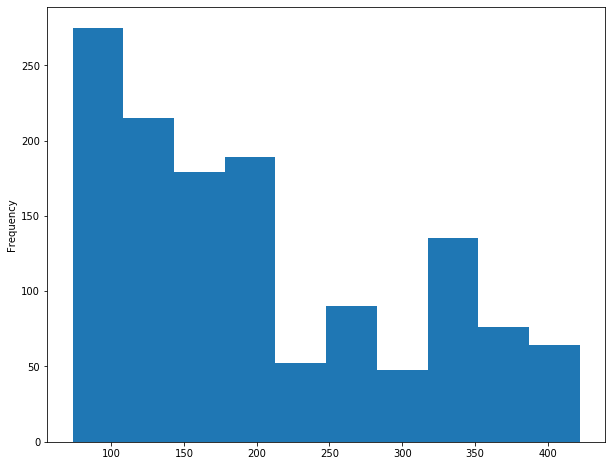

In [19]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(figsize=(10, 8), kind='hist')

# Show the plot
# plt.show()

<a id='commonanalyses'></a>
## Common Financial Analysis

### Returns
* 1
* 2

In [20]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close', 'Volume']]

# print(type(daily_close))

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c.head())

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)
daily_log_returns2 = daily_log_returns.fillna(0)

# Print daily log returns
print(daily_log_returns2.head())

            Adj Close    Volume
2006-10-02   0.000000  0.000000
2006-10-03  -0.010419  0.109550
2006-10-04   0.017549  0.048531
2006-10-05  -0.007296 -0.175133
2006-10-06  -0.008152 -0.317195
            Adj Close    Volume
2006-10-02   0.000000  0.000000
2006-10-03  -0.010474  0.103954
2006-10-04   0.017396  0.047390
2006-10-05  -0.007323 -0.192533
2006-10-06  -0.008185 -0.381546


In [21]:
# Resample `aapl` to business months, take last observation as value 
def report_average(list_values):
#     return list_values[-1]
    return sum(list_values)/len(list_values)

monthly = aapl.resample('BM').apply(lambda x: x[-1])
# monthly = aapl.resample('BM').apply(report)

# Calculate the monthly percentage change
print(monthly.pct_change())

# Resample `aapl` to quarters, take the mean as value per quarter
# quarter = aapl.resample("4M").apply(report_average)
# quarter = aapl.resample("4M").apply(lambda x: sum(x)/len(x))
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
print(quarter.pct_change())

                Open      High       Low     Close    Volume  Adj Close
2006-10-31       NaN       NaN       NaN       NaN       NaN        NaN
2006-11-30  0.132106  0.134672  0.134987  0.130488  0.735854   0.130488
2006-12-29 -0.089578 -0.078550 -0.084560 -0.074405  0.236584  -0.074405
2007-01-31  0.010840  0.007026  0.011876  0.010490 -0.204714   0.010490
2007-02-28 -0.021918 -0.004651 -0.016005 -0.013064  0.074066  -0.013064
...              ...       ...       ...       ...       ...        ...
2011-08-31  0.007559 -0.007769 -0.005573 -0.014469 -0.173887  -0.014469
2011-09-30 -0.008833 -0.008136 -0.001781 -0.009121  0.047943  -0.009121
2011-10-31  0.039523  0.052560  0.052128  0.061523 -0.296069   0.061523
2011-11-30 -0.052507 -0.066084 -0.056726 -0.055783  0.053015  -0.055783
2011-12-30  0.058276  0.062781  0.066587  0.059655 -0.557416   0.059655

[63 rows x 6 columns]
                Open      High       Low     Close    Volume  Adj Close
2006-10-31       NaN       NaN       NaN 

In [22]:
# Daily returns
print(daily_close.tail())
print(daily_close.shift(1).tail())

daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj Close      Volume
2011-12-23  57.618572  67349800.0
2011-12-27  58.075714  66269000.0
2011-12-28  57.520000  57165500.0
2011-12-29  57.874287  53994500.0
2011-12-30  57.857143  44915500.0
            Adj Close      Volume
2011-12-23  56.935715  50589700.0
2011-12-27  57.618572  67349800.0
2011-12-28  58.075714  66269000.0
2011-12-29  57.520000  57165500.0
2011-12-30  57.874287  53994500.0
            Adj Close    Volume
2006-10-02        NaN       NaN
2006-10-03  -0.010419  0.109550
2006-10-04   0.017549  0.048531
2006-10-05  -0.007296 -0.175133
2006-10-06  -0.008152 -0.317195
...               ...       ...
2011-12-23   0.011993  0.331295
2011-12-27   0.007934 -0.016048
2011-12-28  -0.009569 -0.137372
2011-12-29   0.006159 -0.055471
2011-12-30  -0.000296 -0.168147

[1323 rows x 2 columns]


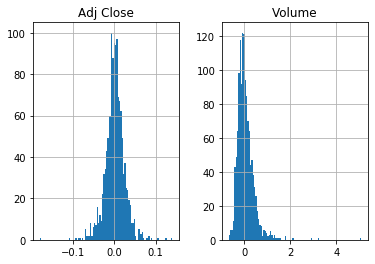

         Adj Close       Volume
count  1322.000000  1322.000000
mean      0.001566     0.050442
std       0.023992     0.377852
min      -0.179195    -0.669079
25%      -0.010672    -0.183473
50%       0.001677    -0.010483
75%       0.014306     0.204777
max       0.139050     5.090526


In [23]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=100)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [24]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close    Volume
2006-10-02        NaN       NaN
2006-10-03   0.989581  1.109550
2006-10-04   1.006946  1.163398
2006-10-05   0.999599  0.959649
2006-10-06   0.991451  0.655253
...               ...       ...
2011-12-23   5.387791  0.378030
2011-12-27   5.430537  0.371964
2011-12-28   5.378574  0.320866
2011-12-29   5.411702  0.303068
2011-12-30   5.410099  0.252108

[1323 rows x 2 columns]


In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [ ]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

cum_monthly_return.plot(figsize=(20, 8))
plt.show()

In [ ]:
from pandas_datareader import data as pdr
import yfinance
import datetime
import pandas as pd

def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head()

In [ ]:
# Isolate the adjusted closing price
import numpy as np

all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']
return_data

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

In [ ]:
#all_data = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/all_stock_data.csv", index_col= [0,1], header=0, parse_dates=[1])

In [ ]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()
 
# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

In [ ]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

### Moving Windows

In [ ]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
print(moving_avg[-10:])
moving_avg.plot()

In [ ]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()

plt.show()

### Volatility Calculation

In [ ]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

### Ordinary Least-Squares Regression (OLS)

In [ ]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm
from pandas import tseries
# from pandas.core import datetools

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

In [ ]:
import matplotlib.pyplot as plt

plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
print(ax)
x = np.linspace(ax[0], ax[1] + 0.01)
# x = np.array([-0.1, 0.12])
y = model.params[0] + model.params[1] * x
print("x=", x)
print("y=", y)
plt.plot(x, y, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()

In [ ]:
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()

<a id='tradingstrategy'></a>
## Building A Trading Strategy With Python

In [ ]:
# Initialize the short and long windows
short_window = 40
long_window = 100

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

signals[['short_mavg', 'long_mavg']].plot()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()
plt.show()
signals['signal'].plot()
plt.show()
signals['positions'].plot()

In [ ]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot
plt.show()

<a id='backtesting'></a>
## Backtesting A Strategy

### Implementation Of A Simple Backtester With Pandas

In [ ]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()
print(pos_diff)

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)

print("Cumulative Sum:")
print((portfolio['holdings']).cumsum())

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (portfolio['holdings']).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()

print(portfolio.tail())
print(signals.tail())

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

<a id='evaluating'></a>
## Evaluating Moving Average Crossover Strategy 

### Sharpe Ratio

In [ ]:
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

### Maximum Drawdown

In [ ]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

### Compound Annual Growth Rate (CAGR)

In [ ]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)